In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [5]:
train = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /titanic/train.csv')
test = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /titanic/test.csv')
test_dataY = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /titanic/gender_submission.csv')

In [6]:

def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

Survived :
 female    233
male      109
Name: Sex, dtype: int64
Dead:
 male      468
female     81
Name: Sex, dtype: int64


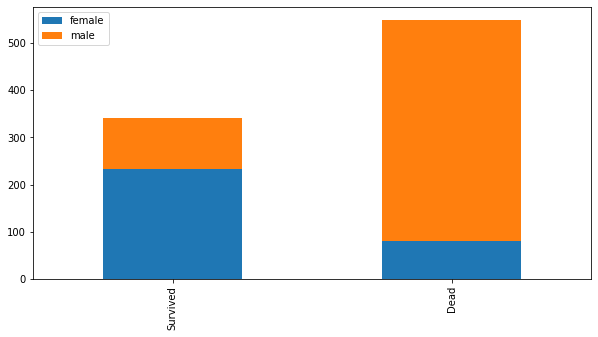

In [7]:
bar_chart('Sex')
print("Survived :\n",train[train['Survived']==1]['Sex'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Sex'].value_counts())

Survived :
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Dead:
 3    372
2     97
1     80
Name: Pclass, dtype: int64


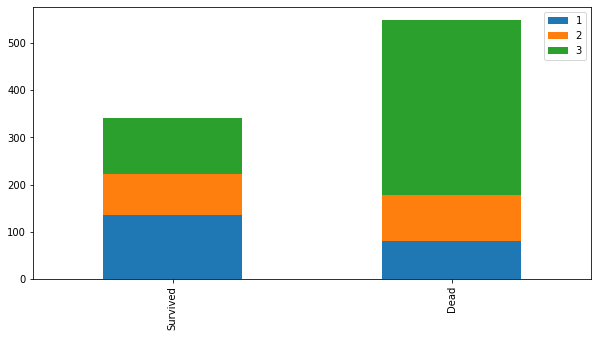

In [8]:

bar_chart('Pclass')
print("Survived :\n",train[train['Survived']==1]['Pclass'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Pclass'].value_counts())

Survived :
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
Dead:
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


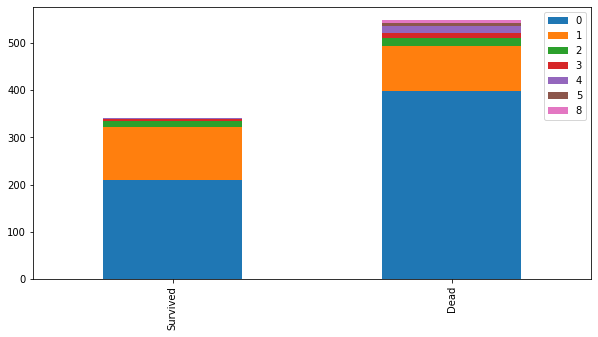

In [9]:
bar_chart('SibSp')
print("Survived :\n",train[train['Survived']==1]['SibSp'].value_counts())
print("Dead:\n",train[train['Survived']==0]['SibSp'].value_counts())

Survived :
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
Dead:
 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


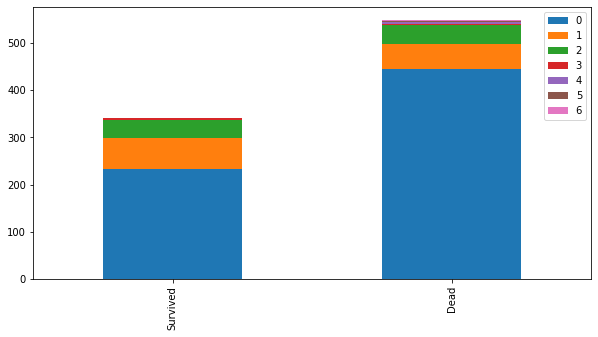

In [10]:
bar_chart('Parch')
print("Survived :\n",train[train['Survived']==1]['Parch'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Parch'].value_counts())

Survived :
 S    217
C     93
Q     30
Name: Embarked, dtype: int64
Dead:
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


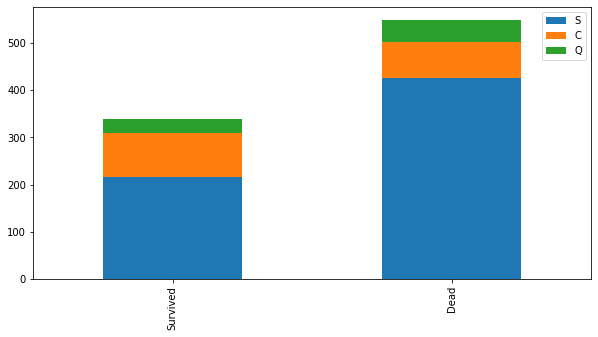

In [11]:

bar_chart('Embarked')
print("Survived :\n",train[train['Survived']==1]['Embarked'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Embarked'].value_counts())

In [12]:

train_test_data = [train,test] # combine dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [13]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Sir           1
Ms            1
Mme           1
Capt          1
Jonkheer      1
Lady          1
Don           1
Countess      1
Name: Title, dtype: int64

In [14]:

test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [15]:

title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for dataset in train_test_data:
    dataset['Title'] = dataset["Title"].map(title_mapping)

In [16]:
dataset.head()

PassengerId  Pclass  ... Embarked Title
0          892       3  ...        Q     0
1          893       3  ...        S     2
2          894       2  ...        Q     0
3          895       3  ...        S     0
4          896       3  ...        S     2

[5 rows x 12 columns]

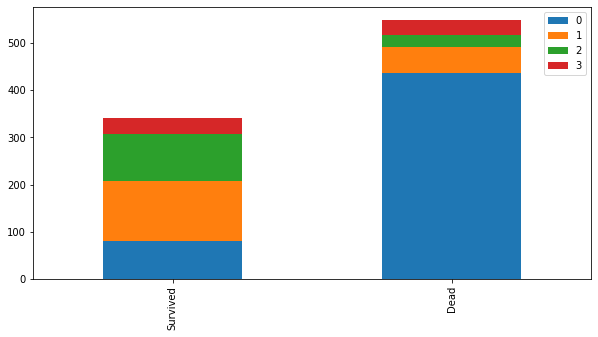

In [17]:
bar_chart('Title')

In [18]:

# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [19]:

sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [21]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace= True)
test["Age"].fillna(test.groupby('Title')['Age'].transform("median"), inplace= True)

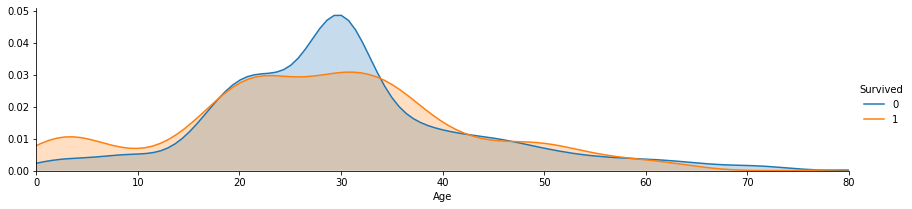

(10.0, 50.0)

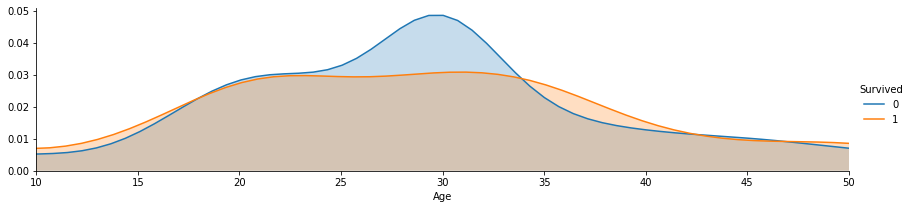

In [22]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend() 
plt.show()

facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend() 
plt.xlim(10,50)

In [23]:

for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4
# for dataset in train_test_data:
#     dataset.loc[]
#train[train['Age'].isin([23])]

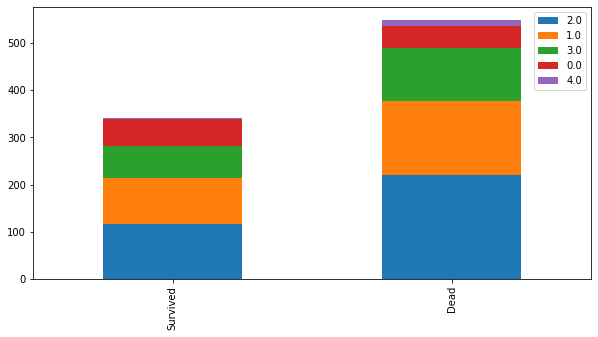

In [24]:

train.head()
bar_chart('Age')

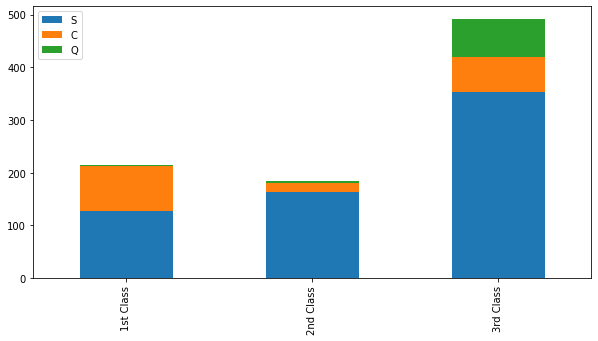

Pclass1:
 S    127
C     85
Q      2
Name: Embarked, dtype: int64
Pclass2:
 S    164
C     17
Q      3
Name: Embarked, dtype: int64
Pclass3:
 S    353
Q     72
C     66
Name: Embarked, dtype: int64


In [25]:

Pclass1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st Class','2nd Class','3rd Class']
df.plot(kind = 'bar', stacked =  True, figsize=(10,5))
plt.show()
print("Pclass1:\n",Pclass1)
print("Pclass2:\n",Pclass2)
print("Pclass3:\n",Pclass3)

In [26]:
for dataset in train_test_data:
    dataset['Embarked'] =  dataset['Embarked'].fillna('S')

In [27]:
embarked_mapping = {'S':0,'C':1,'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [28]:

# train["Fare"].fillna(train.groupby("Pclass")["Fare"])
# train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace = True)
# test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace = True)
# train.head(50)


# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)

PassengerId  Survived  Pclass  Sex  ...      Fare        Cabin  Embarked Title
0             1         0       3    0  ...    7.2500          NaN         0     0
1             2         1       1    1  ...   71.2833          C85         1     2
2             3         1       3    1  ...    7.9250          NaN         0     1
3             4         1       1    1  ...   53.1000         C123         0     2
4             5         0       3    0  ...    8.0500          NaN         0     0
5             6         0       3    0  ...    8.4583          NaN         2     0
6             7         0       1    0  ...   51.8625          E46         0     0
7             8         0       3    0  ...   21.0750          NaN         0     3
8             9         1       3    1  ...   11.1333          NaN         0     2
9            10         1       2    1  ...   30.0708          NaN         1     2
10           11         1       3    1  ...   16.7000           G6         0     1
11           12         1       1    1  ...   26.5500         C103         0     1
12           13         0       3    0  ...    8.0500          NaN         0     0
13           14         0       3    0  ...   31.2750          NaN         0     0
14           15         0       3    1  ...    7.8542          NaN         0     1
15           16         1       2    1  ...   16.0000          NaN         0     2
16           17         0       3    0  ...   29.1250          NaN         2     3
17           18         1       2    0  ...   13.0000          NaN         0     0
18           19         0       3    1  ...   18.0000          NaN         0     2
19           20         1       3    1  ...    7.2250          NaN         1     2
20           21         0       2    0  ...   26.0000          NaN         0     0
21           22         1       2    0  ...   13.0000          D56         0     0
22           23         1       3    1  ...    8.0292          NaN         2     1
23           24         1       1    0  ...   35.5000           A6         0     0
24           25         0       3    1  ...   21.0750          NaN         0     1
25           26         1       3    1  ...   31.3875          NaN         0     2
26           27         0       3    0  ...    7.2250          NaN         1     0
27           28         0       1    0  ...  263.0000  C23 C25 C27         0     0
28           29         1       3    1  ...    7.8792          NaN         2     1
29           30         0       3    0  ...    7.8958          NaN         0     0
30           31         0       1    0  ...   27.7208          NaN         1     3
31           32         1       1    1  ...  146.5208          B78         1     2
32           33         1       3    1  ...    7.7500          NaN         2     1
33           34         0       2    0  ...   10.5000          NaN         0     0
34           35         0       1    0  ...   82.1708          NaN         1     0
35           36         0       1    0  ...   52.0000          NaN         0     0
36           37         1       3    0  ...    7.2292          NaN         1     0
37           38         0       3    0  ...    8.0500          NaN         0     0
38           39         0       3    1  ...   18.0000          NaN         0     1
39           40         1       3    1  ...   11.2417          NaN         1     1
40           41         0       3    1  ...    9.4750          NaN         0     2
41           42         0       2    1  ...   21.0000          NaN         0     2
42           43         0       3    0  ...    7.8958          NaN         1     0
43           44         1       2    1  ...   41.5792          NaN         1     1
44           45         1       3    1  ...    7.8792          NaN         2     1
45           46         0       3    0  ...    8.0500          NaN         0     0
46           47         0       3    0  ...   15.5000          NaN         2     0
47           48     

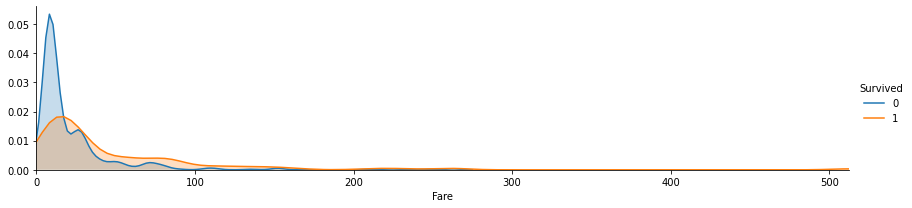

In [29]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4 )
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim = (0, train['Fare'].max()))
facet.add_legend()
plt.show()

(0.0, 20.0)

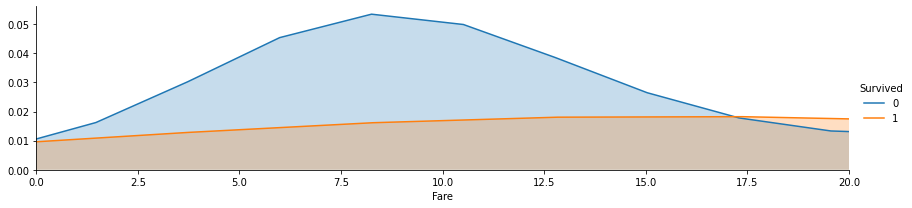

In [30]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

In [31]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[dataset['Fare'] >= 100, 'Fare'] = 3

In [32]:
for dataset in train_test_data:
    dataset['Cabin'] =  dataset['Cabin'].str[:1]

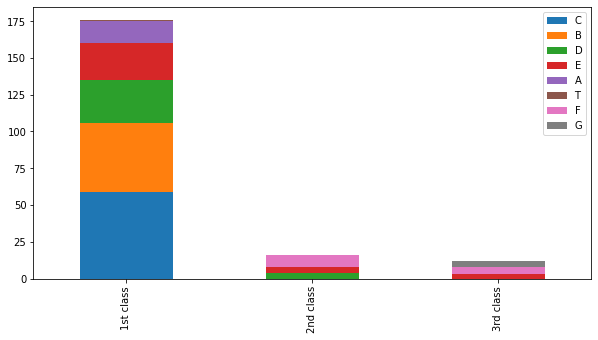

In [33]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [34]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [35]:

# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [36]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0.0, 11.0)

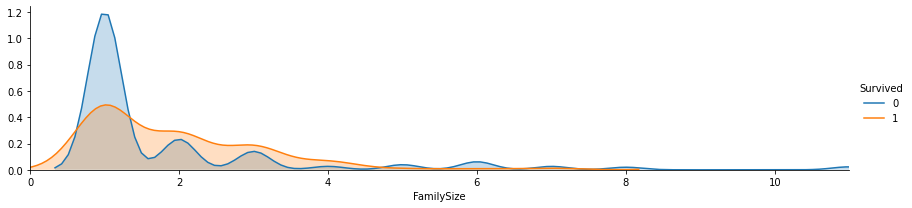

In [37]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [38]:

family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [39]:

features_drop = ['Ticket','SibSp','Parch']
train = train.drop(features_drop, axis = 1)
test = test.drop(features_drop,axis=1)
train = train.drop(['PassengerId'], axis=1)

In [40]:

train_data = train.drop('Survived', axis = 1)
target = train['Survived']
train_data.shape, target.shape

((891, 8), (891,))

In [41]:

# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [43]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.76404494 0.80898876 0.83146067 0.87640449 0.82022472
 0.85393258 0.79775281 0.84269663 0.84269663]


In [44]:
#learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
clf = [KNeighborsClassifier(n_neighbors = 13),DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=13),GaussianNB(),SVC(),ExtraTreeClassifier(),
      GradientBoostingClassifier(n_estimators=10, learning_rate=1,max_features=3, max_depth =3, random_state = 10),AdaBoostClassifier(),ExtraTreesClassifier()]
def model_fit():
    scoring = 'accuracy'
    for i in range(len(clf)):
        score = cross_val_score(clf[i], train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
        print("Score of Model",i,":",round(np.mean(score)*100,2))
#     round(np.mean(score)*100,2)
#     print("Score of :\n",score)
model_fit()

Score of Model 0 : 82.6
Score of Model 1 : 79.58
Score of Model 2 : 81.48
Score of Model 3 : 78.78
Score of Model 4 : 83.5
Score of Model 5 : 79.13
Score of Model 6 : 81.25
Score of Model 7 : 81.03
Score of Model 8 : 80.92


In [49]:
test

PassengerId  Pclass  Sex  Age  Fare  Cabin  Embarked  Title  FamilySize
0            892       3    0  2.0   0.0    2.0         2      0         0.0
1            893       3    1  3.0   0.0    2.0         0      2         0.4
2            894       2    0  3.0   0.0    2.0         2      0         0.0
3            895       3    0  2.0   0.0    2.0         0      0         0.0
4            896       3    1  1.0   0.0    2.0         0      2         0.8
..           ...     ...  ...  ...   ...    ...       ...    ...         ...
413         1305       3    0  2.0   0.0    2.0         0      0         0.0
414         1306       1    1  3.0   3.0    0.8         1      3         0.0
415         1307       3    0  3.0   0.0    2.0         0      0         0.0
416         1308       3    0  2.0   0.0    2.0         0      0         0.0
417         1309       3    0  0.0   1.0    2.0         1      3         0.8

[418 rows x 9 columns]

In [50]:
clf1 = SVC()
clf1.fit(train_data, target)
test
test_data = test.drop(['PassengerId'], axis=1)
prediction = clf1.predict(test_data)

In [52]:
prediction.shape

(418,)

In [55]:
pred_y = prediction.reshape(-1)
all_id = np.array(test_dataY['PassengerId'])
y_pred = pd.DataFrame(list(zip(all_id, pred_y)),columns =['PassengerId', 'Survived'])
y_pred.to_csv("/content/drive/My Drive/MY ML JOURNEY/.98.csv", index=False)